In [1]:
from functions_ngates import calc_variance
from functions_ngates_cuda import calc_variance_optimized
import torch as th
import numpy as np
import matplotlib.pyplot as plt
from icecream import ic

Using device: cuda


In [2]:
layers1 = np.arange(1, 10)

In [31]:
variances1 = [calc_variance(4, l, n_sim=30, n_sim_noise=10, fast_ent=True, noise='dephasing')[:,-1] for l in layers1]

In [32]:
variances2 = [calc_variance_optimized(4, l, n_sim=30, n_sim_noise=10, fast_ent=True, noise='dephasing')[:,-1] for l in layers1]

In [25]:
var1 = []
var2 = []
var0 = []

for l in range(9):
    resh1 = variances1[l].reshape(-1,10)
    resh2 = variances2[l].reshape(-1,100)
    var1.append(th.std(th.mean(resh1, dim=1)))
    var2.append(th.std(th.mean(resh2, dim=1)).to('cpu').numpy())
    var0.append(th.std(resh2[:,10]).to('cpu').numpy())

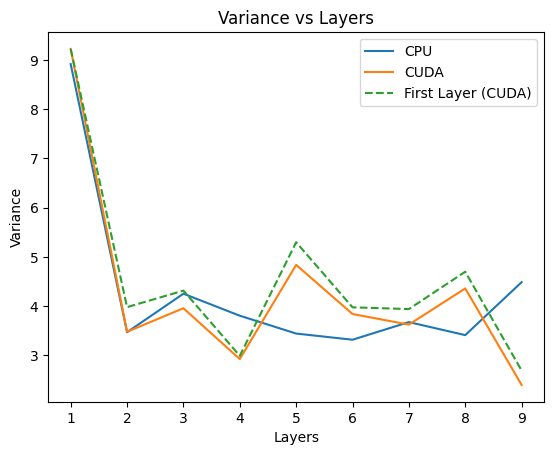

In [26]:
plt.plot(layers1, var1, label='CPU')
plt.plot(layers1, var2, label='CUDA')
plt.plot(layers1, var0, label='First Layer (CUDA)', linestyle='--')
plt.xlabel('Layers')
plt.ylabel('Variance')
plt.title('Variance vs Layers')
plt.legend()
plt.show()

In [3]:
import cProfile

cProfile.run("calc_variance(4, 4, n_sim=200, n_sim_noise=1, fast_ent=True, noise='dephasing')")

         151256 function calls in 1.510 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    1.510    1.510 <string>:1(<module>)
    22400    0.022    0.000    0.125    0.000 _tensor.py:1058(__array__)
    22400    0.038    0.000    0.096    0.000 _tensor.py:1068(__array_wrap__)
      800    0.001    0.000    0.284    0.000 functions_ngates.py:106(noisy_gate)
      800    0.032    0.000    1.432    0.002 functions_ngates.py:113(layer)
        1    0.042    0.042    1.510    1.510 functions_ngates.py:131(calc_variance)
      800    0.072    0.000    1.116    0.001 functions_ngates.py:24(global_rotation)
        1    0.000    0.000    0.000    0.000 functions_ngates.py:34(cnot_gates)
     3200    0.710    0.000    0.994    0.000 functions_ngates.py:7(U3_rotation)
        1    0.000    0.000    0.003    0.003 functions_ngates.py:77(generate_H)
      800    0.028    0.000    0.282    0.000 functions_ng

In [4]:
cProfile.run("run_minibatch_noiseless_ensemble(4, 4, n_sim=200, fast_ent=True, batch_size=100)")

Running MINI-BATCH simulation on cuda (N=4, n_sim=200, batch_size=100)
Processing batch 2/2...
Simulation complete.
         1663 function calls (1660 primitive calls) in 0.791 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1053(_handle_fromlist)
       25    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:244(_verbose_message)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:357(__init__)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:746(find_spec)
        1    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:826(find_spec)
        3    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:893(__enter__)
        3    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:897(__exit__)
        1    0.000    0.000    0.002    0.002 <frozen importli

In [ ]:
import time

batch_sizes = np.arange(1, 100, 20)

timings = []

for batch_size in batch_sizes:
    start = time.time()
    run_minibatch_noiseless_ensemble(4, 4, n_sim=400, fast_ent=True, batch_size=batch_size)
    end = time.time()
    timings.append(end - start)

Running MINI-BATCH simulation on cuda (N=4, n_sim=400, batch_size=1)
Processing batch 400/400...
Simulation complete.
Running MINI-BATCH simulation on cuda (N=4, n_sim=400, batch_size=21)
Processing batch 20/20...
Simulation complete.
Running MINI-BATCH simulation on cuda (N=4, n_sim=400, batch_size=41)
Processing batch 10/10...
Simulation complete.
Running MINI-BATCH simulation on cuda (N=4, n_sim=400, batch_size=61)
Processing batch 7/7...
Simulation complete.
Running MINI-BATCH simulation on cuda (N=4, n_sim=400, batch_size=81)
Processing batch 5/5...

ic| f"Batch size: {bs}, Time: {t:.4f} seconds": 'Batch size: 1, Time: 6.6307 seconds'
ic| f"Batch size: {bs}, Time: {t:.4f} seconds": 'Batch size: 21, Time: 7.5069 seconds'
ic| f"Batch size: {bs}, Time: {t:.4f} seconds": 'Batch size: 41, Time: 6.9171 seconds'



Simulation complete.


ic| f"Batch size: {bs}, Time: {t:.4f} seconds": 'Batch size: 61, Time: 6.8730 seconds'
ic| f"Batch size: {bs}, Time: {t:.4f} seconds": 'Batch size: 81, Time: 6.5662 seconds'


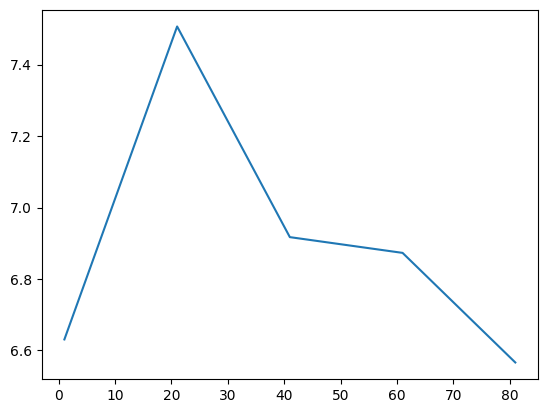

In [52]:
plt.plot(batch_sizes, timings)